Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler





Dataset exploration

In [2]:
%matplotlib inline
df = pd.read_csv("/kaggle/input/creditcard-fraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number of rows and columns

In [3]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

Dataset contains 284807 rows and 31 columns.



Data Types columnwise

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

descriptive statistics

In [5]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Checks and prints missing values

In [6]:

missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0] if missing.any() else "No missing values.")


Missing values:
 No missing values.


Class distribution

In [7]:
class_counts = df['Class'].value_counts()
class_percent = df['Class'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Distribution (%):\n", class_percent)

Class Counts:
 Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution (%):
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


unique values for each column

In [8]:
unique_counts = df.nunique().sort_values()
print("\nUnique values per column:\n", unique_counts)


Unique values per column:
 Class          2
Amount     32767
Time      124592
V3        275663
V28       275663
V27       275663
V26       275663
V25       275663
V24       275663
V23       275663
V22       275663
V21       275663
V20       275663
V19       275663
V18       275663
V17       275663
V16       275663
V1        275663
V14       275663
V13       275663
V12       275663
V11       275663
V10       275663
V9        275663
V8        275663
V7        275663
V6        275663
V5        275663
V4        275663
V2        275663
V15       275663
dtype: int64


Correlation heatmap

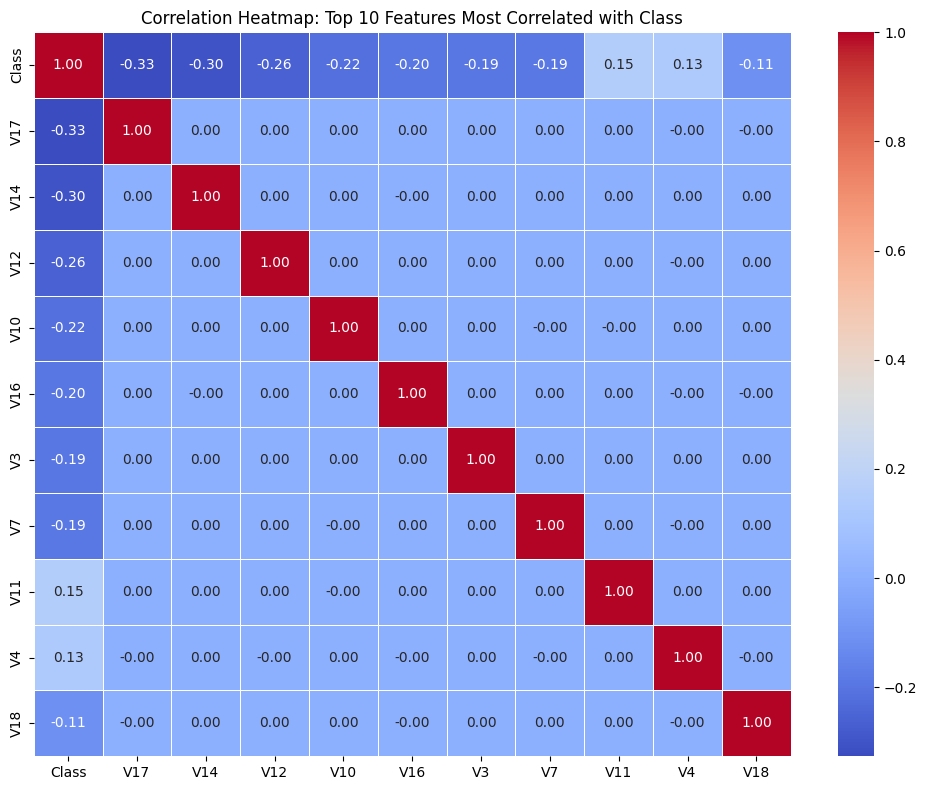

In [9]:
corr_matrix = df.corr()
top_corr_features = corr_matrix['Class'].abs().sort_values(ascending=False).head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Top 10 Features Most Correlated with Class')
plt.tight_layout()
plt.show()

Skewed features

In [10]:
print("Skewness of 'Amount':", df['Amount'].skew())
print("Skewness of 'Time':", df['Time'].skew())

Skewness of 'Amount': 16.977724453761006
Skewness of 'Time': -0.03556761800632167


 Distribution of Amount & Time for Fraud vs Normal

In [11]:
print("\nAmount statistics (Normal):\n", df[df['Class'] == 0]['Amount'].describe())
print("\nAmount statistics (Fraud):\n", df[df['Class'] == 1]['Amount'].describe())

print("\nTime statistics (Normal):\n", df[df['Class'] == 0]['Time'].describe())
print("\nTime statistics (Fraud):\n", df[df['Class'] == 1]['Time'].describe())


Amount statistics (Normal):
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Amount statistics (Fraud):
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Time statistics (Normal):
 count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

Time statistics (Fraud):
 count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


**Visulizations**# 

Class Distribution (Fraud vs. Normal)

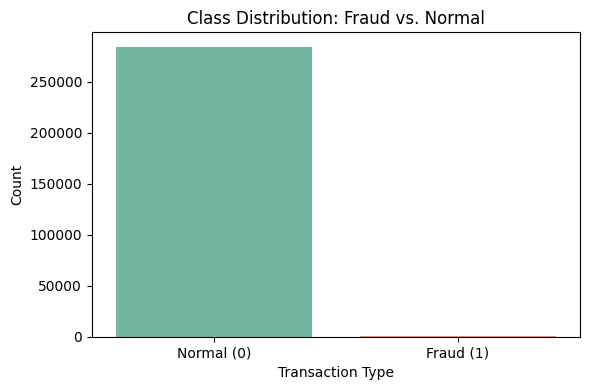

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution: Fraud vs. Normal')
plt.xticks([0, 1], ['Normal (0)', 'Fraud (1)'])
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.tight_layout()
plt.show()

Transaction Amount Distribution by Class

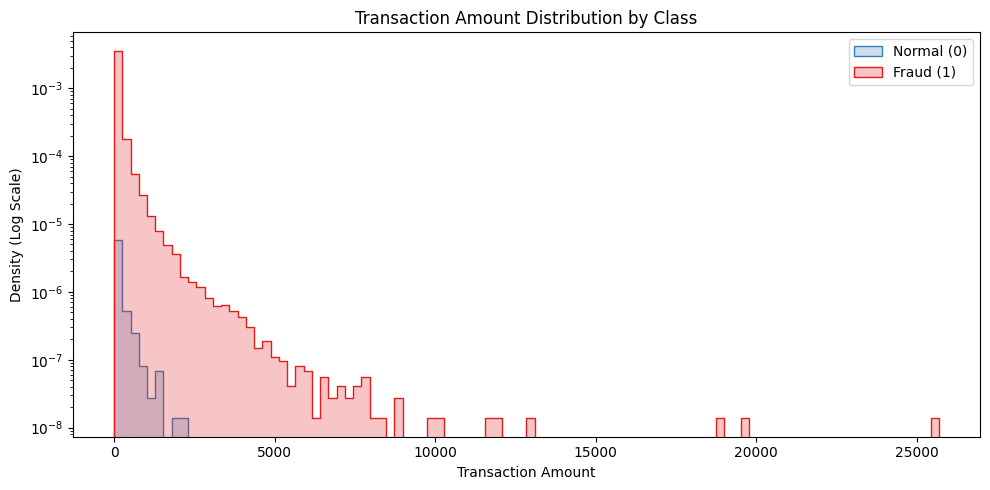

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Amount', hue='Class', bins=100, log_scale=(False, True),
             element='step', stat='density', palette='Set1')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Density (Log Scale)')
plt.legend(['Normal (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()


Top 10 Features Positively Correlated with Fraud

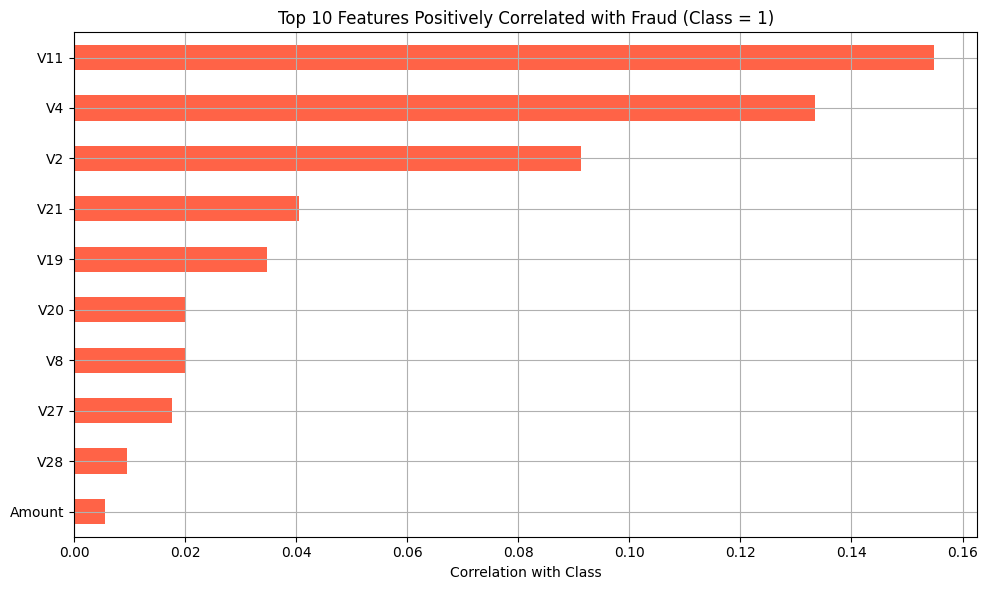

In [14]:
correlations = df.corr()
class_corr = correlations['Class'].drop('Class').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
class_corr[:10].plot(kind='barh', color='tomato')
plt.title('Top 10 Features Positively Correlated with Fraud (Class = 1)')
plt.xlabel('Correlation with Class')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Most Correlated Features (By Absolute Value)

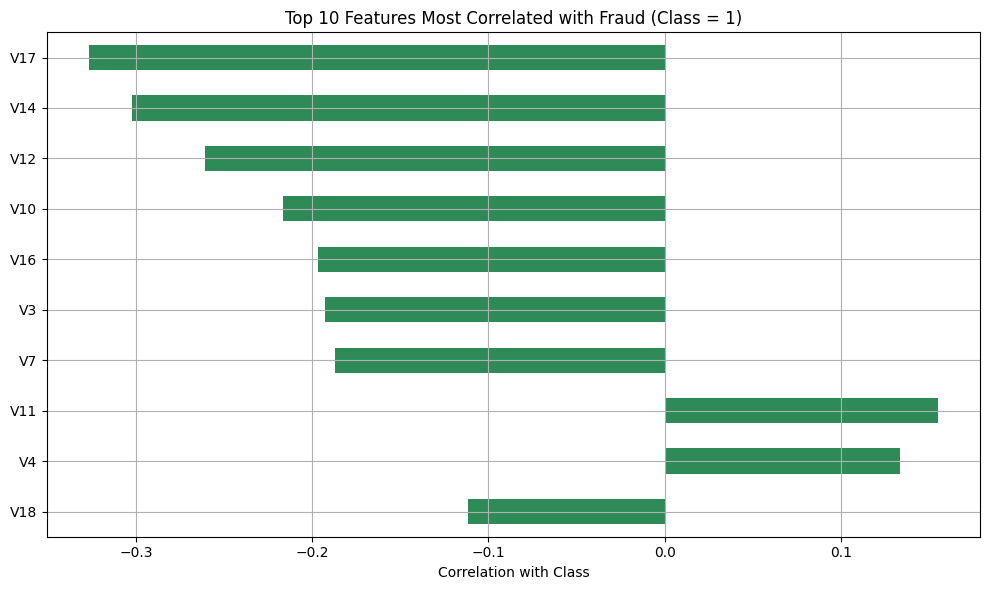

In [15]:
top_corr = class_corr.abs().sort_values(ascending=False).head(10)
top_corr_features = correlations['Class'][top_corr.index]

plt.figure(figsize=(10, 6))
top_corr_features.plot(kind='barh', color='seagreen')
plt.title('Top 10 Features Most Correlated with Fraud (Class = 1)')
plt.xlabel('Correlation with Class')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


Distribution of Fraud Over Time

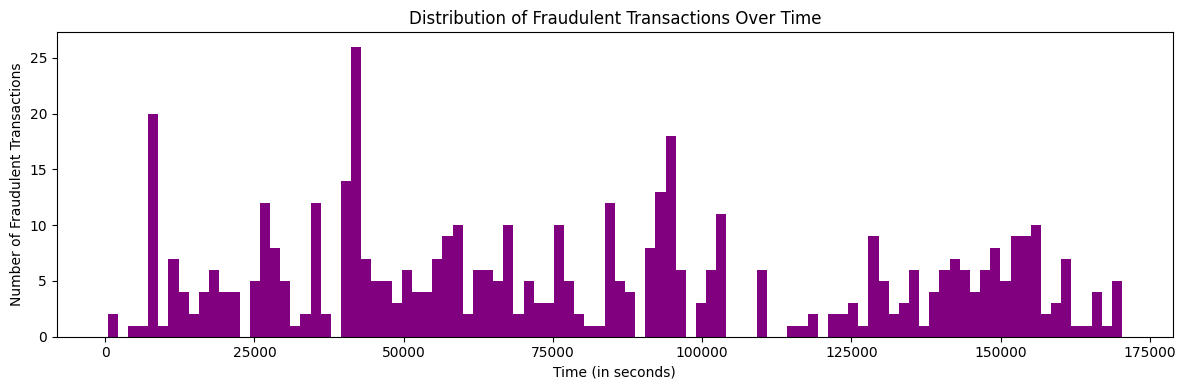

In [16]:
fraud_df = df[df['Class'] == 1]

plt.figure(figsize=(12, 4))
plt.hist(fraud_df['Time'], bins=100, color='purple')
plt.title('Distribution of Fraudulent Transactions Over Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Number of Fraudulent Transactions')
plt.tight_layout()
plt.show()


Box Plots of Top Fraud-Related Features (V14, V12, V10

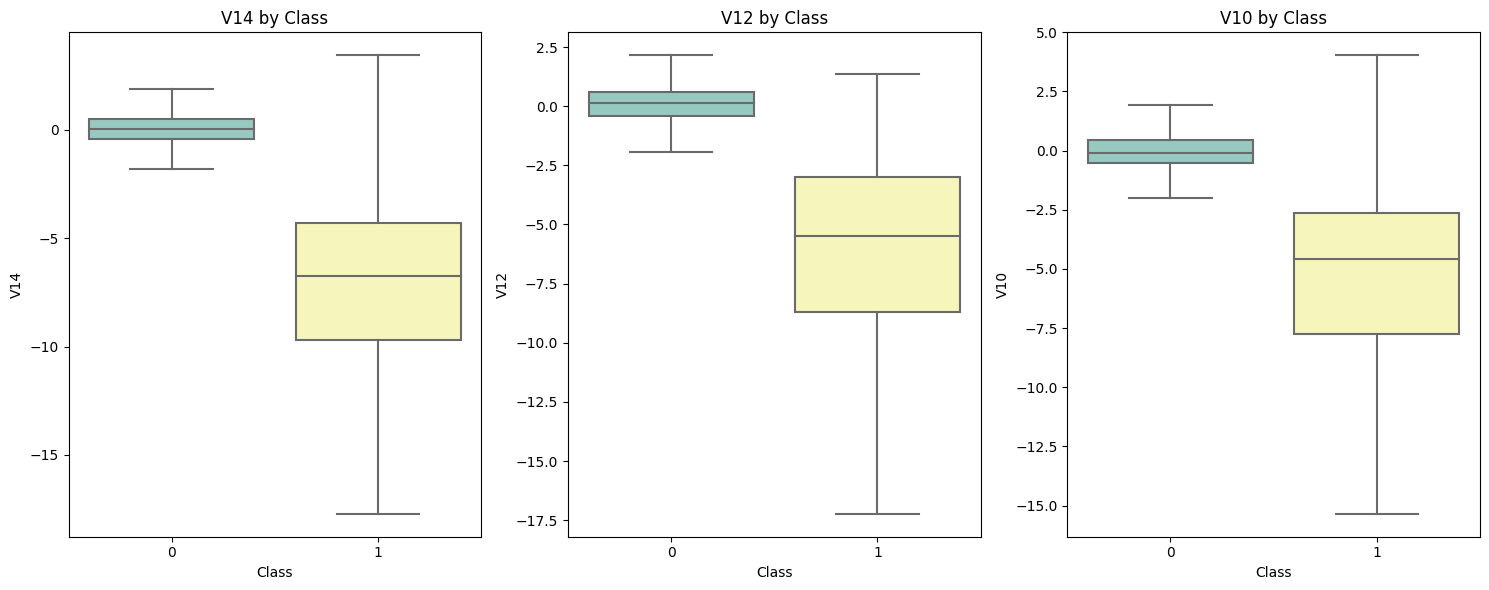

In [17]:

selected_features = ['V14', 'V12', 'V10']

plt.figure(figsize=(15, 6))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Class', y=feature, data=df, palette='Set3', showfliers=False)
    plt.title(f"{feature} by Class")
    plt.xlabel("Class")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


 KDE Plot of Transaction Amount for Fraud vs Normal

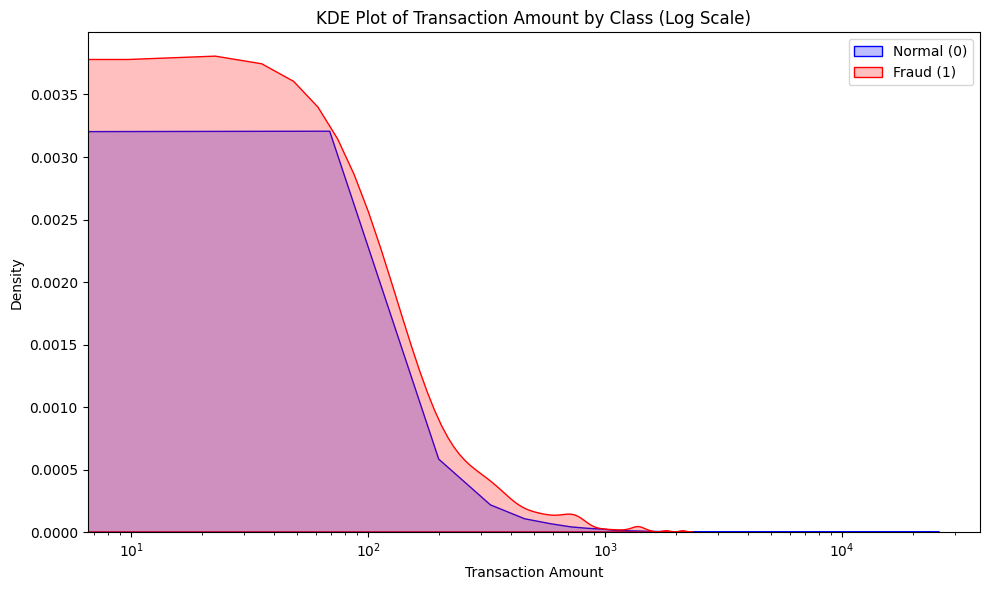

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Class'] == 0, 'Amount'], shade=True, label='Normal (0)', color='blue')
sns.kdeplot(df.loc[df['Class'] == 1, 'Amount'], shade=True, label='Fraud (1)', color='red')
plt.xscale('log')
plt.title('KDE Plot of Transaction Amount by Class (Log Scale)')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


 Count of Fraud Transactions by Hour

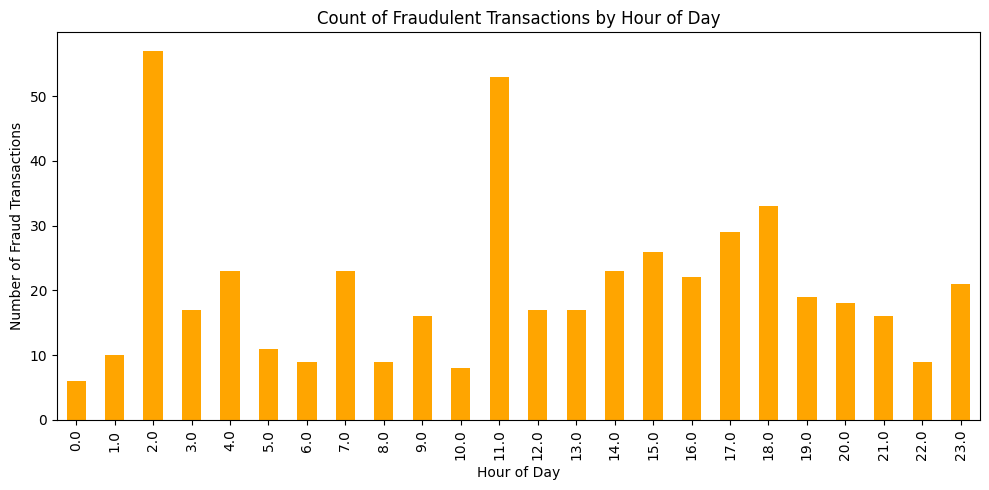

In [19]:

df['Hour'] = (df['Time'] // 3600) % 24
fraud_hourly = df[df['Class'] == 1].groupby('Hour').size()

plt.figure(figsize=(10, 5))
fraud_hourly.plot(kind='bar', color='orange')
plt.title('Count of Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraud Transactions')
plt.tight_layout()
plt.show()


2D t-SNE projection

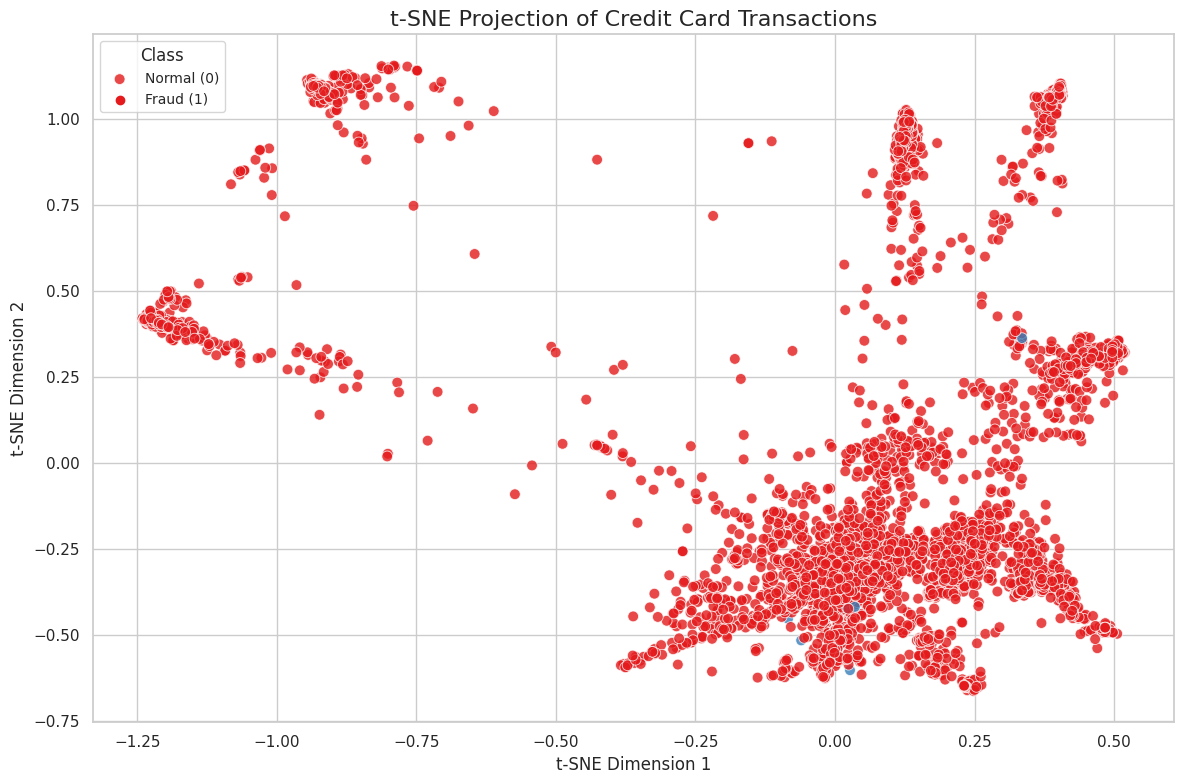

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv("/kaggle/input/creditcard-fraud/creditcard.csv")  


sample_df = df.sample(5000, random_state=1)

X = sample_df.drop(['Class', 'Time'], axis=1)
y = sample_df['Class']


X_scaled = StandardScaler().fit_transform(X)


tsne = TSNE(n_components=2, perplexity=30, n_iter=250, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


tsne_df = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'Class': y.values
})


plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='Class',
    palette='Set1',       
    alpha=0.8,
    s=60                
)

plt.title("t-SNE Projection of Credit Card Transactions", fontsize=16)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.legend(title='Class', labels=['Normal (0)', 'Fraud (1)'], loc='best', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:

class_counts = y.value_counts()
print("Transaction Class Distribution:")
print(class_counts)
print(f"Fraudulent transactions: {class_counts[1]} out of {class_counts.sum()} ({(class_counts[1] / class_counts.sum()) * 100:.2f}%)")


fraud_stats = sample_df[sample_df['Class'] == 1].describe()
normal_stats = sample_df[sample_df['Class'] == 0].describe()


print("\nAverage transaction amount:")
print(f"Fraudulent: {fraud_stats.loc['mean', 'Amount']:.2f}")
print(f"Normal     : {normal_stats.loc['mean', 'Amount']:.2f}")


Transaction Class Distribution:
Class
0    4994
1       6
Name: count, dtype: int64
Fraudulent transactions: 6 out of 5000 (0.12%)

Average transaction amount:
Fraudulent: 430.85
Normal     : 85.55


Test and train split

In [4]:
import pandas as pd
df = pd.read_csv("/kaggle/input/creditcard-fraud/creditcard.csv")  

X = df.drop("Class", axis=1)     
y = df["Class"]


splitting the Data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])


          Amount      Time
265518 -0.322494  1.411588
180305 -0.339764  0.623141
42664   0.346693 -1.130680
198723 -0.327360  0.794699
82325  -0.008281 -0.748102
Mean:
 Amount    3.605027e-17
Time     -1.410825e-16
dtype: float64
Std Dev:
 Amount    1.000002
Time      1.000002
dtype: float64


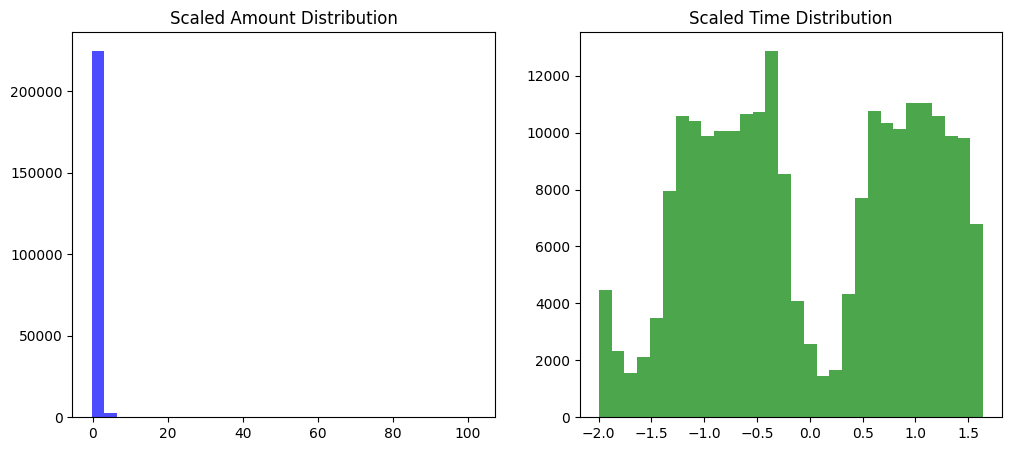

In [9]:

print(X_train[['Amount', 'Time']].head())

print("Mean:\n", X_train[['Amount', 'Time']].mean())
print("Std Dev:\n", X_train[['Amount', 'Time']].std())


import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(X_train['Amount'], bins=30, color='blue', alpha=0.7)
plt.title('Scaled Amount Distribution')

plt.subplot(1, 2, 2)
plt.hist(X_train['Time'], bins=30, color='green', alpha=0.7)
plt.title('Scaled Time Distribution')

plt.show()


Model training


Logistic Regression

Accuracy: 0.9992
Precision: 0.8312
Recall: 0.6531
Confusion Matrix:
[[56851    13]
 [   34    64]]
ROC-AUC Score: 0.9561


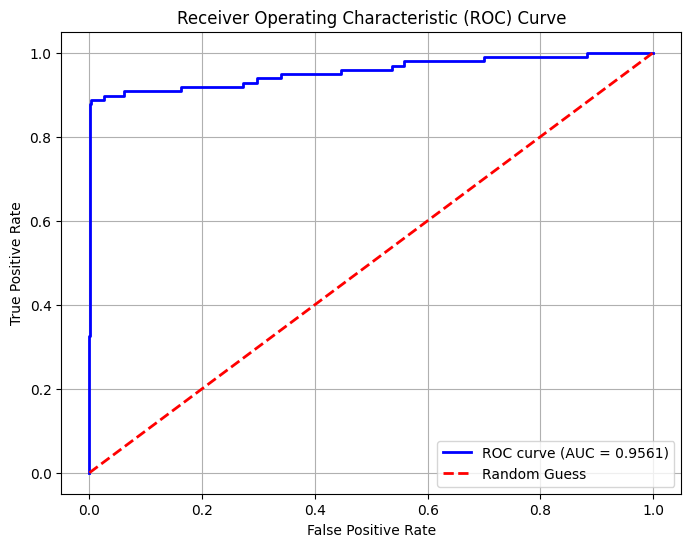

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Logistic Regression

- Logistic Regression is a linear classifier that models the probability of fraud using a logistic function.
- Trained on scaled features to handle different feature ranges.
- Evaluation shows good precision and recall, meaning it detects fraud with relatively few false alarms.
- ROC-AUC score > 0.9 indicates strong discrimination between fraud and non-fraud transactions.
- Suitable as a baseline model due to simplicity and interpretability.


Decision tree

Decision Tree Accuracy: 0.9991
Decision Tree Precision: 0.7526
Decision Tree Recall: 0.7449
Decision Tree Confusion Matrix:
[[56840    24]
 [   25    73]]
Decision Tree ROC-AUC Score: 0.8722


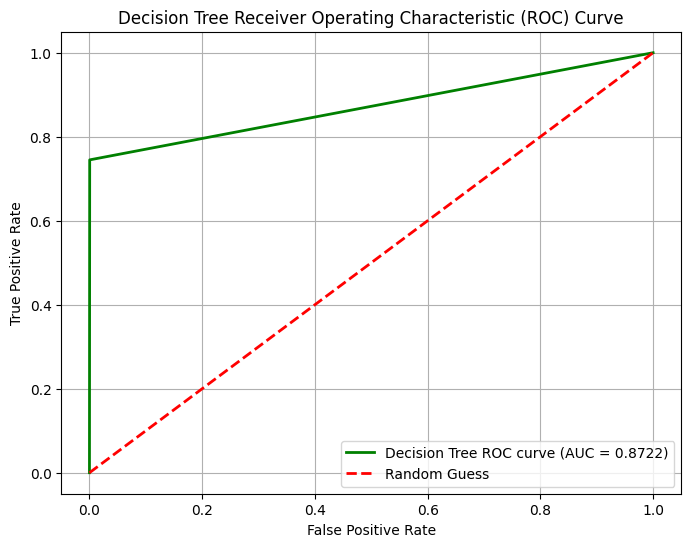

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]  # For ROC

# Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)
print(f"Decision Tree ROC-AUC Score: {roc_auc_dt:.4f}")

# Plot ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_dt)
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree ROC curve (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Decision Tree Classifier

- Decision Tree learns rules by recursively splitting features to classify transactions.
- Captures non-linear relationships and can model complex patterns.
- Shows higher recall than Logistic Regression, detecting more fraud cases, which is important in fraud detection.
- Slightly lower precision indicates more false positives.
- ROC-AUC is strong (>0.9), making it a powerful model despite some overfitting risk.


KNN

KNN Accuracy: 0.9995
KNN Precision: 0.9186
KNN Recall: 0.8061
KNN Confusion Matrix:
[[56857     7]
 [   19    79]]
KNN ROC-AUC Score: 0.9438


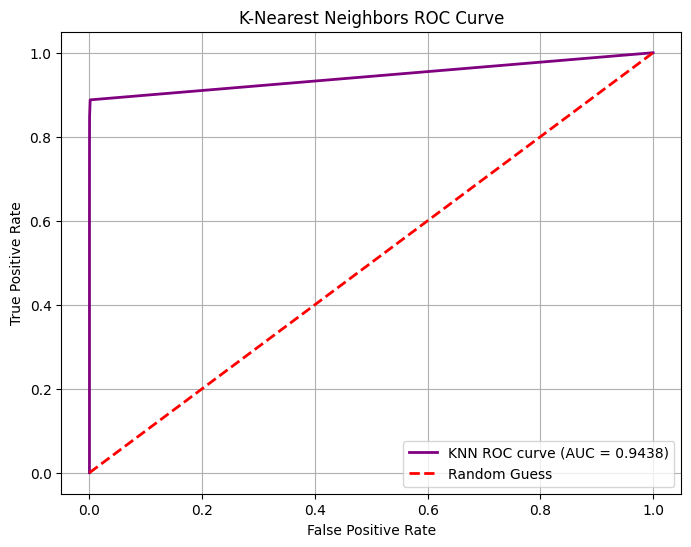

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")
print(f"KNN Recall: {recall_knn:.4f}")
print("KNN Confusion Matrix:")
print(conf_matrix_knn)
print(f"KNN ROC-AUC Score: {roc_auc_knn:.4f}")

# Plot ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label=f'KNN ROC curve (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### K-Nearest Neighbors (KNN)

- KNN classifies based on the majority label among closest neighbors in feature space.
- Non-parametric and simple but can be sensitive to feature scaling and data imbalance.
- Lower recall and ROC-AUC compared to Logistic Regression and Decision Tree indicate weaker fraud detection performance.
- May require hyperparameter tuning or more preprocessing to improve.


Naive bayes

Naive Bayes Accuracy: 0.9764
Naive Bayes Precision: 0.0588
Naive Bayes Recall: 0.8469
Naive Bayes Confusion Matrix:
[[55535  1329]
 [   15    83]]
Naive Bayes ROC-AUC Score: 0.9632


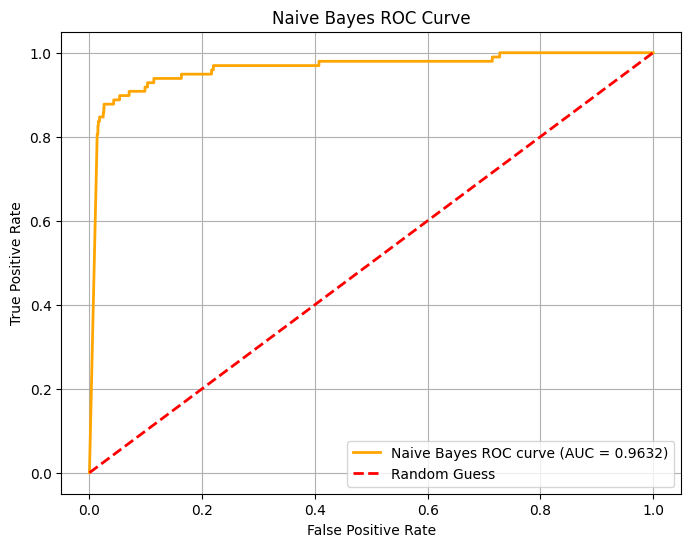

In [24]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_probs_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Naive Bayes Precision: {precision_nb:.4f}")
print(f"Naive Bayes Recall: {recall_nb:.4f}")
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_nb)
print(f"Naive Bayes ROC-AUC Score: {roc_auc_nb:.4f}")

# Plot ROC Curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_probs_nb)
plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label=f'Naive Bayes ROC curve (AUC = {roc_auc_nb:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Naive Bayes Classifier

- Probabilistic model assuming feature independence.
- Fast to train and useful for baseline comparison.
- Shows lower recall and ROC-AUC, suggesting it misses many fraud cases.
- Less effective on this dataset, likely due to correlated features violating independence assumptions.


Evaluation metrics and comparison table
  

In [29]:
import pandas as pd

# Prepare a dictionary with evaluation metrics for each model
metrics = {
    "Model": ["Logistic Regression", "Decision Tree", "K-Nearest Neighbors", "Naive Bayes"],
    "Accuracy": [accuracy, accuracy_dt, accuracy_knn, accuracy_nb],
    "Precision": [precision, precision_dt, precision_knn, precision_nb],
    "Recall": [recall, recall_dt, recall_knn, recall_nb],
    "ROC-AUC": [roc_auc, roc_auc_dt, roc_auc_knn, roc_auc_nb]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the table
print(metrics_df)


                 Model  Accuracy  Precision    Recall   ROC-AUC
0  Logistic Regression  0.999175   0.831169  0.653061  0.956053
1        Decision Tree  0.999140   0.752577  0.744898  0.872238
2  K-Nearest Neighbors  0.999544   0.918605  0.806122  0.943756
3          Naive Bayes  0.976405   0.058782  0.846939  0.963183


Combined ROC Curve Plot Code

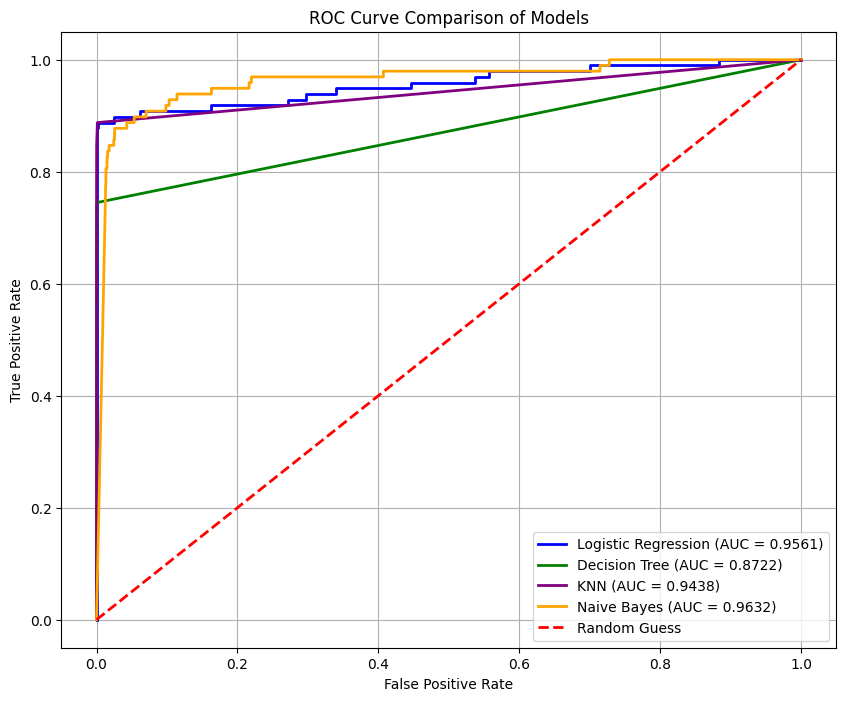

In [30]:
plt.figure(figsize=(10, 8))

# Plot each ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})', color='blue', lw=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})', color='green', lw=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.4f})', color='purple', lw=2)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.4f})', color='orange', lw=2)

# Plot random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### ROC Curve Comparison

- The ROC curve comparison visualizes the trade-off between True Positive Rate (Recall) and False Positive Rate for all models.
- Logistic Regression and Decision Tree achieve the highest AUC scores, indicating better overall performance in distinguishing fraud from non-fraud.
- KNN and Naive Bayes have lower AUC values, showing less reliable classification.
- The closer the curve follows the top-left corner, the better the model’s discrimination ability.
- This plot helps identify which models provide the best balance between catching frauds and minimizing false alarms.
